In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from IPython.display import display

import thinkstats2_mod
import thinkplot

import statsmodels.formula.api as smf

In [2]:
dct = thinkstats2_mod.ReadStataDct('GSS/GSS.dct')
df = dct.ReadFixedWidth('GSS/GSS.dat')
print('Total number of respondents: %i' %(df.shape[0] + 1))

Total number of respondents: 62467


In [3]:
# Filter out years without relevant data
df = df[df.year >= 1974]
print('Number of respondents left: %i' %(df.shape[0] + 1))

# Filter out invalid polviews
df = df[df.polviews <= 7]
df = df[df.polviews > 0]

# Center polviews likert scale around 0
df['polviews'] = np.subtract(df['polviews'], 4)
print('Number of respondents left: %i' %(df.shape[0] + 1))

# Filter out marital status no answers
df = df[df.marital != 9]
print('Number of respondents left: %i' %(df.shape[0] + 1))

df_control = df.copy(deep=True)

Number of respondents left: 59350
Number of respondents left: 53082
Number of respondents left: 53064


In [4]:
pmf_married   = thinkstats2_mod.Pmf(df_control[df_control.marital == 1].polviews)
pmf_widowed   = thinkstats2_mod.Pmf(df_control[df_control.marital == 2].polviews)
pmf_divorced  = thinkstats2_mod.Pmf(df_control[df_control.marital == 3].polviews)
pmf_separated = thinkstats2_mod.Pmf(df_control[df_control.marital == 4].polviews)
pmf_nmarried  = thinkstats2_mod.Pmf(df_control[df_control.marital == 5].polviews)

In [5]:
def plot_bar(pmf, colors, shift=0, align='center', width=1):
    """
    Plots bar graphs and allows x-axis shifting with thinkstats2 PMF objects.
    pmf:    thinkstats2 pmf object
    colors: list of colors for bars
    shift:  number for x-axis shift (useful for interleaving or plotting multiple pmf objects)
    align:  parameter passed onto plt.bar
    width:  parameter passed onto plt.bar
    """
    x_axis = list(pmf.GetDict().keys())
    y_axis = list(pmf.GetDict().values())

    for i in range(len(x_axis)):
        plt.bar(x_axis[i]+shift, y_axis[i] * 100, align=align, width=width, color=colors[x_axis[i] + 3], edgecolor = "#ffffff")

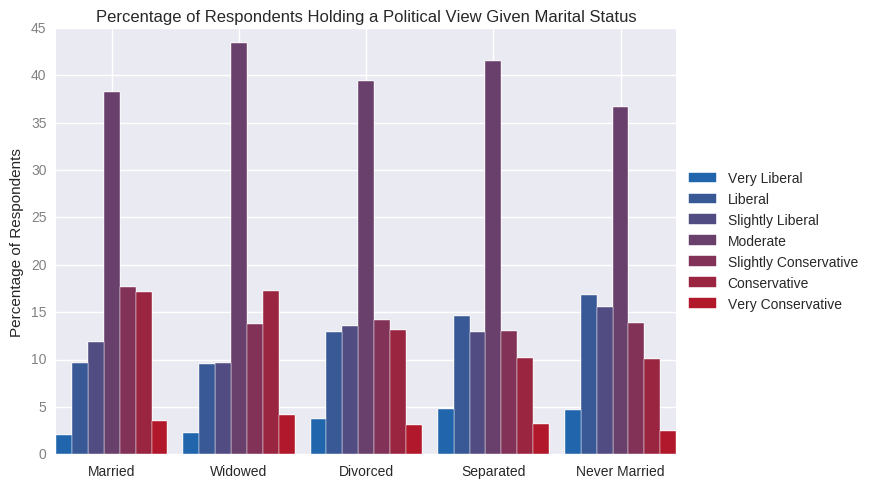

In [16]:
# Make y tick labels gray
ax = plt.axes()
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# Set width of bar plot bars and calculate x-axis shifts
width = 1
shifts = [-width*8*2, -width*8, 0, width*8, width*8*2]

# List PMFs to plot
pmfs_to_plot = [pmf_married, pmf_widowed, pmf_divorced, pmf_separated, pmf_nmarried]

# List of bar colors for bar plot gradient
colors = ['#2166ac', '#395996', '#514C81', '#693F6B', '#813256', '#992540', '#B2182B']

# Create PMF plots
for i in range(len(pmfs_to_plot)):
    plot_bar(pmfs_to_plot[i], colors=colors, shift=shifts[i], width=width)

# Text labels for x-axis and legend
marriage_status = ('Married', 'Widowed', 'Divorced', 'Separated', 'Never Married')
pol_views = ('Very Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative', 'Conservative', 'Very Conservative')

# Set custom colors for legend that match color gradient in bar graphs
patches = []
for i in range(len(pol_views)):
    patches.append(mpatches.Patch(color=colors[i], label=pol_views[i]))

plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(shifts, marriage_status)
plt.ylabel('Percentage of Respondents')
plt.title('Percentage of Respondents Holding a Political View Given Marital Status')
plt.savefig('Plots/marriage_punchline.svg', bbox_inches='tight')
plt.show()